# Economic Data Analysis with Fred  &  Pandas 

**This is a Data Analytical project that focuses majorly on using the Fedral Reserve Economic Data(FRED) API to extract their large amount of data especially unemployment data and Labor force participation data and analyse the trends and changes over time especially during years of Economic crisis.**

In [1017]:
!pip install --quiet fredapi 

Importing important libraries and importing Fred API

The API key is requested from the Website and is unique for every user

In [1018]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 500) 

from fredapi import Fred 
fred_key='bb674789782056986a350e7830455b5d' #this us the API key

# 1. Creating the Fred Object

In [1019]:
fred=Fred(api_key=fred_key)

# 2. Searching for Economic Data

In [341]:
sp_search=fred.search('S&P',order_by='popularity')

The following is how the dataset of numerous datasets looks like
 where every series id has its own set of data

In [23]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-07-21   2024-07-21   
CSUSHPINSA          CSUSHPINSA     2024-07-21   2024-07-21   
SP500                    SP500     2024-07-21   2024-07-21   
MEHOINUSA672N    MEHOINUSA672N     2024-07-21   2024-07-21   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-07-21   2024-07-21   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-07-18  Daily, Close   
CSUSHPINSA            1987-01-01      2024-04-01       Monthly   
SP500                 2014-07-21      2024-07-19  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-07-18  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-07-19 08:32:10-05:00   
CSUSHPINSA                           NSA  2024-06-25 08:12:01-05:00   
SP500                                NSA  2024-07-19 19:18:07-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-07-19 08:32:13-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pulling Raw data 

In [1023]:
sp500=fred.get_series('SP500')

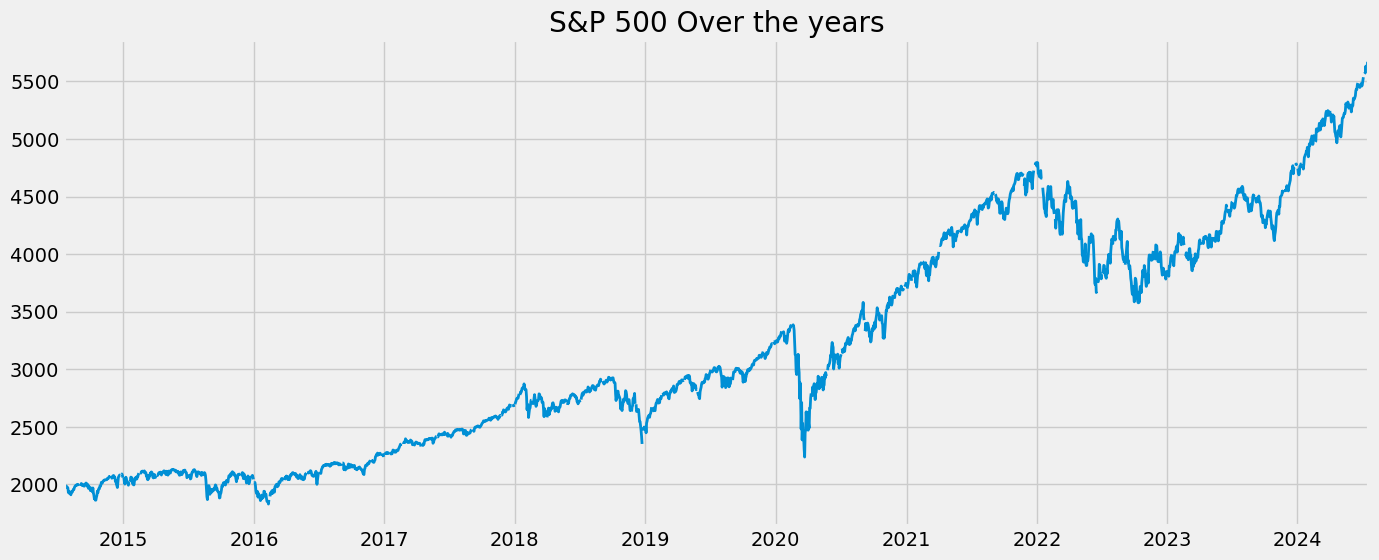

In [1024]:
sp500.plot(figsize=(15,6),title='S&P 500 Over the years',lw=2)  #lw is linewidth
plt.show()

# 4. Fetching Unemployment data by Pulling and Joining Multiple data Series 

Searching across the key word 'unemployment' across the Fred's database 

In [1027]:
uemp_results=fred.search('unemployment')
uemp_results.head(3)

id realtime_start realtime_end               title  \
series id                                                              
UNRATE        UNRATE     2024-07-21   2024-07-21   Unemployment Rate   
UNRATENSA  UNRATENSA     2024-07-21   2024-07-21   Unemployment Rate   
UNEMPLOY    UNEMPLOY     2024-07-21   2024-07-21  Unemployment Level   

          observation_start observation_end frequency frequency_short  \
series id                                                               
UNRATE           1948-01-01      2024-06-01   Monthly               M   
UNRATENSA        1948-01-01      2024-06-01   Monthly               M   
UNEMPLOY         1948-01-01      2024-06-01   Monthly               M   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2024-07-05 07:52:02-05:00         95   
UNRATENSA                       NSA  2024-07-05 07:51:02-05:00         58   
UNEMPLOY                         SA  2024-07-05 07:52:04-05:00         71   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
UNEMPLOY   The series comes from the 'Current Population ...

Fetching Unemplyment rate data on the basis of State 

In [1029]:
unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))

In [1030]:
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent" and id.str.len()==4')#only want city data so city code len is 4
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]#This code ensures that the title contains the key word "unemployment rate
#in"   ####.str.contains() is used in pandas series 

Creating an list that will store all the dataframes in each ID

In [1031]:
all_results=[]
for myid in unemp_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)
#The output will be all the different data frames that is summarued in a list 

In [1035]:
unemp_states=pd.concat(all_results,axis=1) #all_results is a list of each state's unemp rate which is in dataframe type

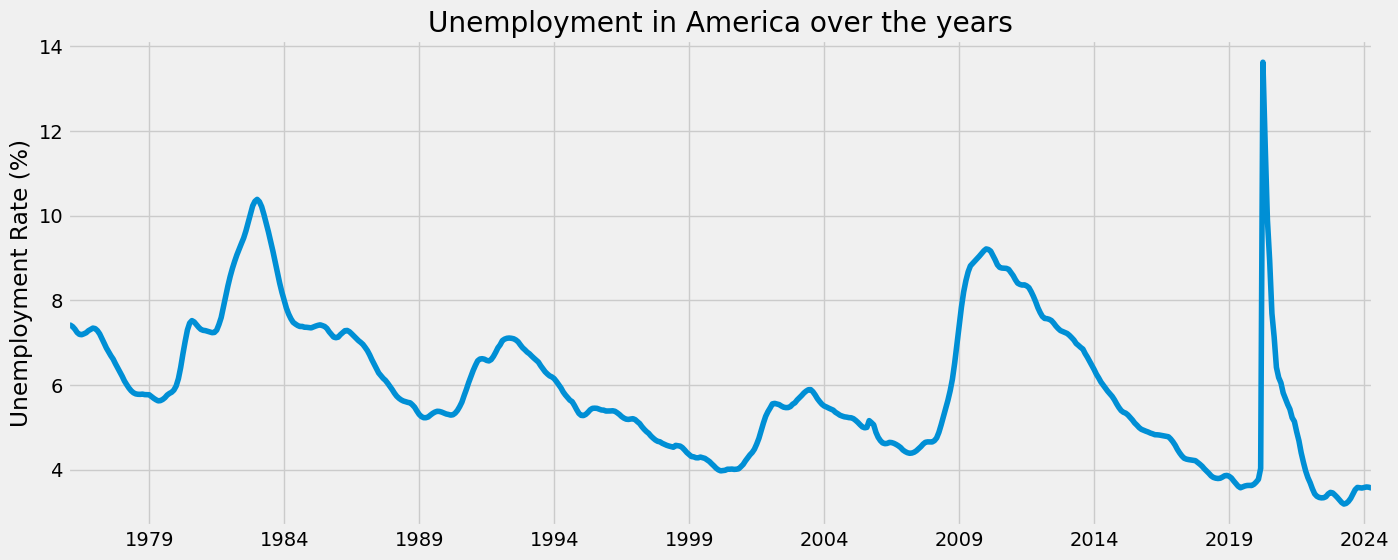

In [1037]:
ax=unemp_states.mean(axis=1).plot(figsize=(15,6),title='Unemployment in America over the years')
ax.set_ylabel("Unemployment Rate (%)")
plt.show()

**OBERVATION**: We can see that in the last 2 decades there has been a few massive unemployment spikes 

Looking at the zist of state data

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



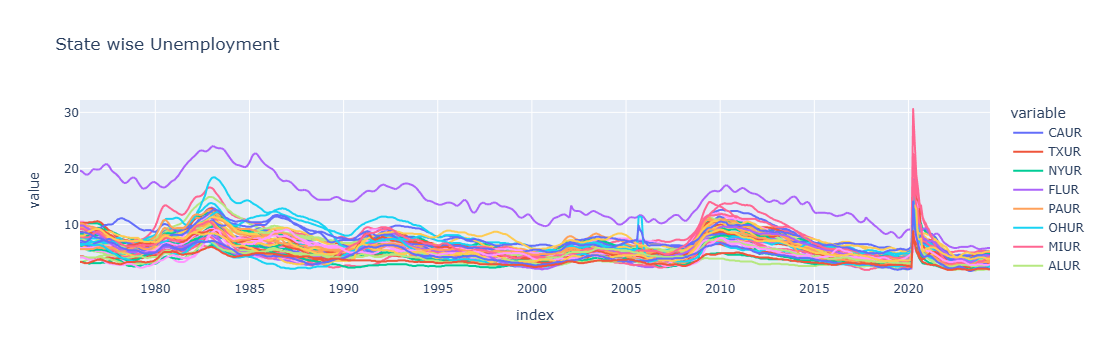

In [1041]:
px.line(unemp_states,title="State wise Unemployment")

# Pulling April 2020(Covid Era) unemployment rate among states 

In [1048]:
unemp_covid=unemp_states.loc[unemp_states.index=="2020-4-01"].T.sort_values("2020-4-01",ascending=False) #.T makes the cells vertical

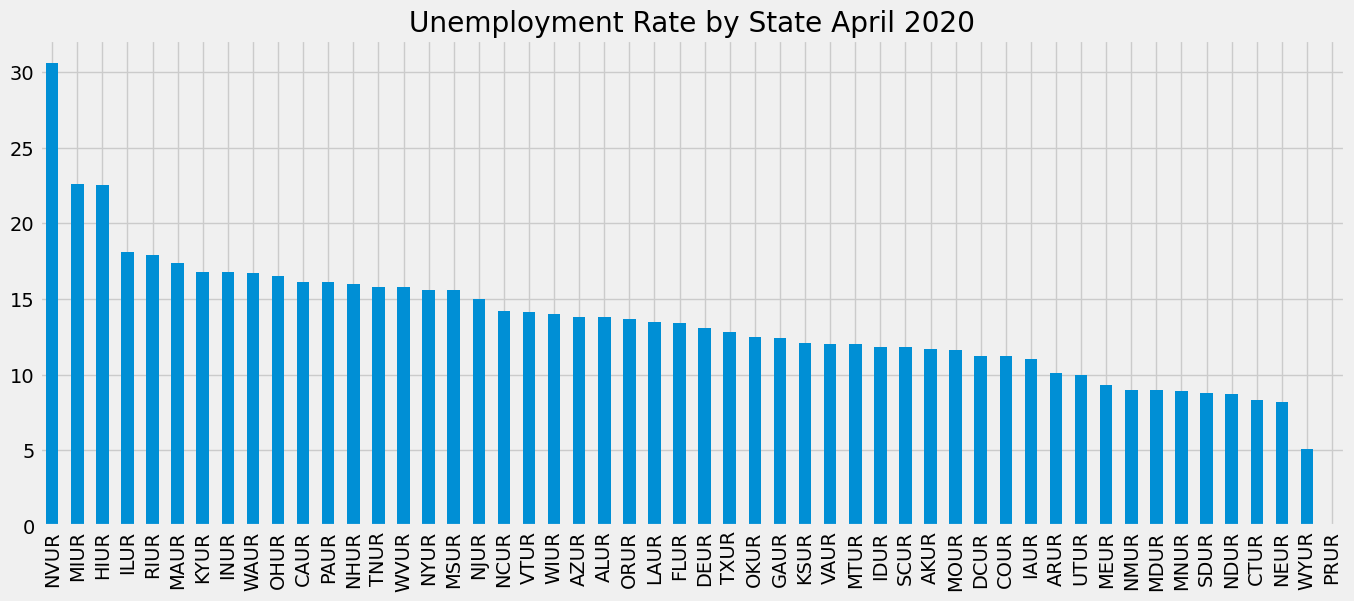

In [1050]:
unemp_covid.plot(kind='bar',figsize=(15,6),title="Unemployment Rate by State April 2020").legend().remove()

In [1052]:
#changing the State codes to State name #returns index and the remaining Title(state name) and converting to dictionary.
#this code returns the sate names and the state codes which are already there as state codes are the index
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in',"").to_dict() 

*In the above code , if you apply .to_series() to the result of str.replace() the core problem is that , you're creating a Series where the index of the original Series (unemp_df['title']) becomes the index of the new Series.  This index may not be suitable for a Series.*

*Why .to_dict() Works:*

*When you use .to_dict(), the original index is discarded, and a dictionary is created where the values become the keys, and the replaced strings become the values. This is often a more appropriate representation of the results of a string replacement operation.*

***Mapping the state codes with State names***

In [1056]:
#Creating a State column and mapping the columns to id state #this is editing the original curated DATASETT
unemp_df['State']=unemp_states.columns.to_series().map(id_to_state)

In [1058]:
unemp_states = unemp_states.rename(columns=id_to_state) #modifying the State Dataset
#mapped the column names to dictionary names 

In [1150]:
unemp_covid=unemp_covid.rename(index=id_to_state) #modifying the covid dataset
unemp_covid.head(3)

2020-04-01
Nevada          30.6
Michigan        22.6
Hawaii          22.5

***Plotting Unemployment rate by State for April 2020***

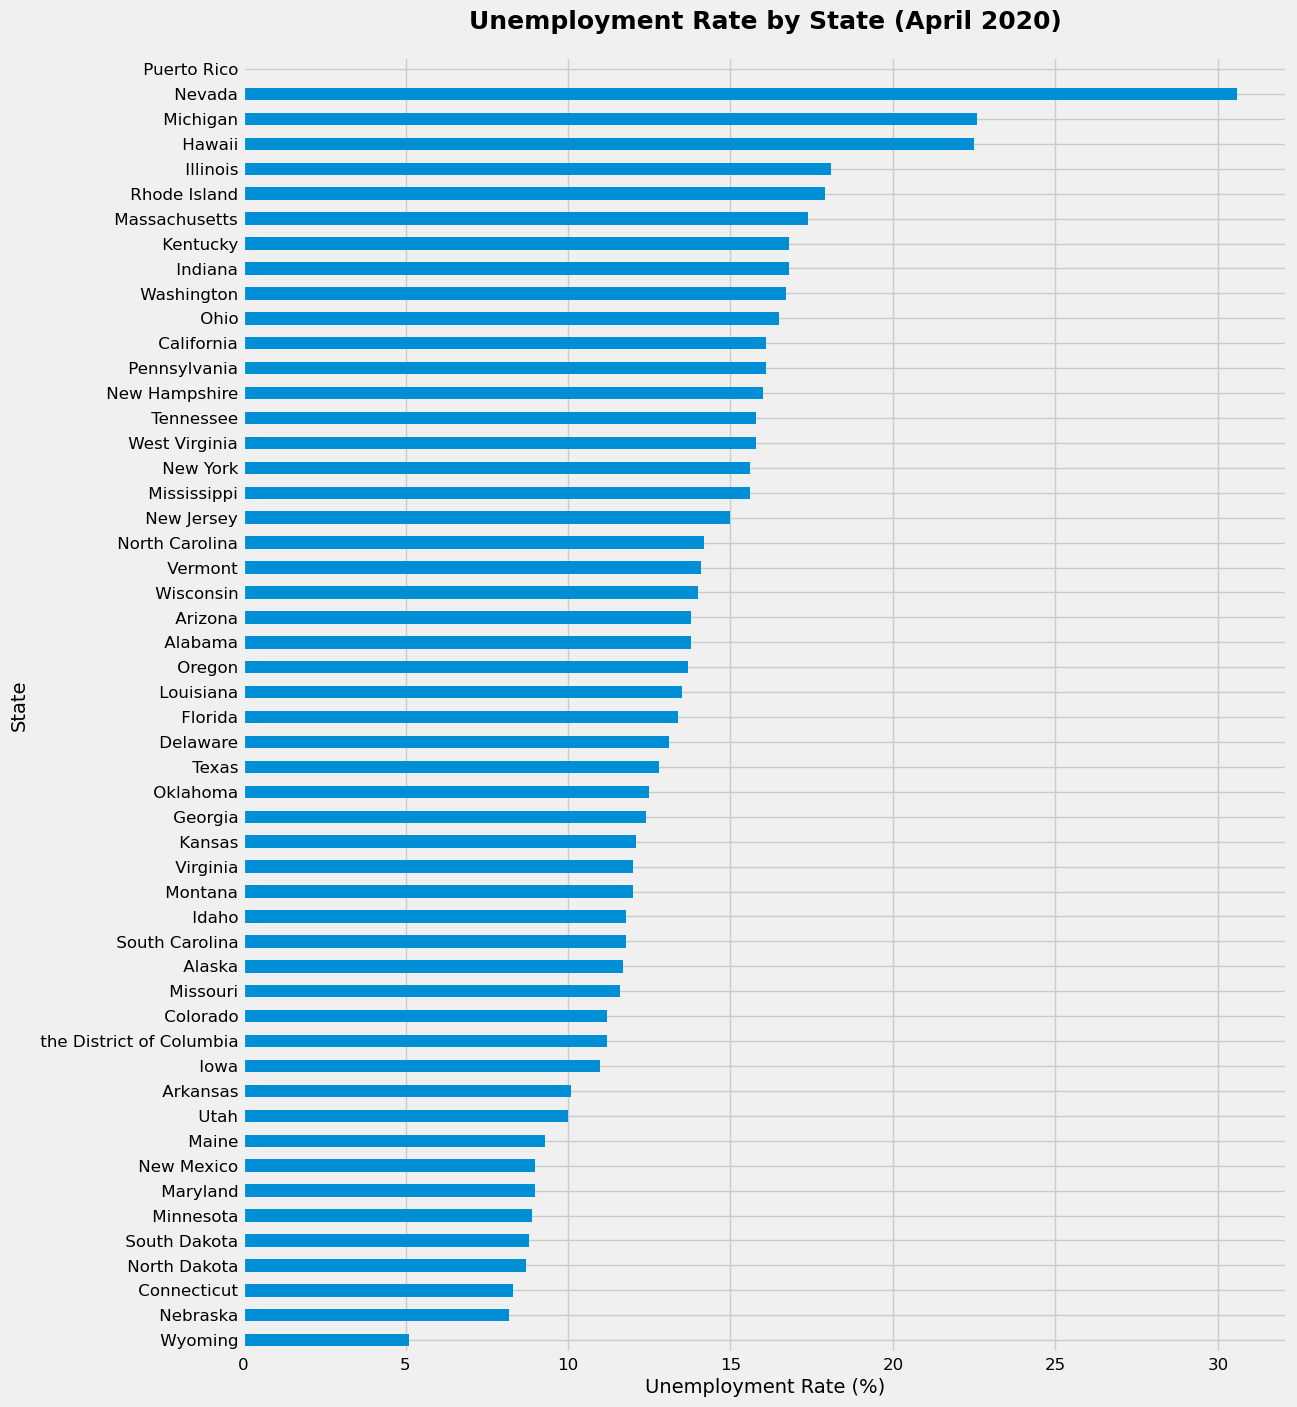

In [1148]:
ax = unemp_covid.sort_values(by='2020-04-01', ascending=True).plot(kind='barh', figsize=(12, 16), title="Unemployment Rate by State (April 2020)")
# Enhancements
ax.set_xlabel("Unemployment Rate (%)", fontsize=14)  # Label x-axis
ax.set_ylabel("State", fontsize=14)                # Label y-axis
ax.set_title("Unemployment Rate by State (April 2020)", fontsize=18, fontweight='bold', pad=20)  # Title
ax.tick_params(axis='both', labelsize=12)
ax.legend().remove()

# Pulling Job Participation rate

In [1065]:
part_df=fred.search('Labour force participation rate state ',filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent" & id.str.len() == 7') 
part_df=part_df.drop('CIVPART')

In [1066]:
#making state wise Labor force participation Rate dataset
all_of_results=[]
for myid in part_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_of_results.append(results)
part_states=pd.concat(all_of_results,axis=1)

In [1069]:
part_id_to_state=part_df['title'].str.replace("Labor Force Participation Rate for","").to_dict()
part_states=part_states.rename(columns=part_id_to_state)

# Unemployment V/S Participation

In [1072]:
# Clean column names by stripping leading and trailing spaces
unemp_states.columns = unemp_states.columns.str.strip()
part_states.columns = part_states.columns.str.strip()

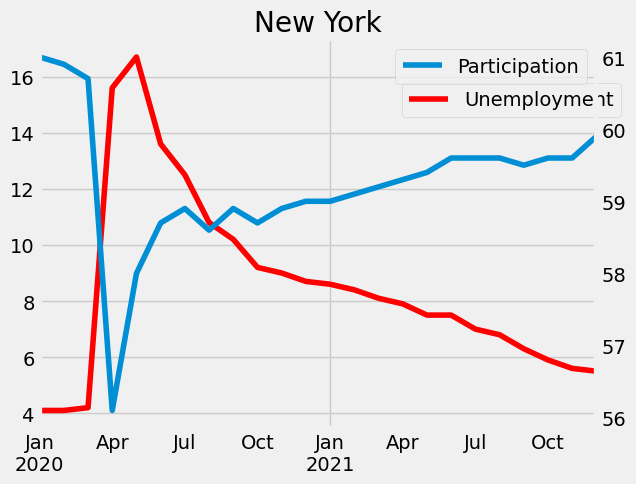

In [1074]:
# Creating subplots
fig, ax= plt.subplots()
ax2=ax.twinx() #this will make 2 plots have common x axis and independent y axis one on right another on left
unemp_states.query('index>=2020 and index<2022')['New York'].plot(ax=ax,label="Unemployment",color='red')
part_states.query('index>=2020 and index<2022')['New York'].plot(ax=ax2,label="Participation")
ax2.grid(False)
ax.legend(loc=(0.65, 0.8))
ax2.legend()
ax.set_title('New York')
plt.show()

In [1076]:
#fixing 
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'}) #as the part_tabel as the name District of Columbia

***Plotting Unemployment & Job Participation Rate (2020-2022)***

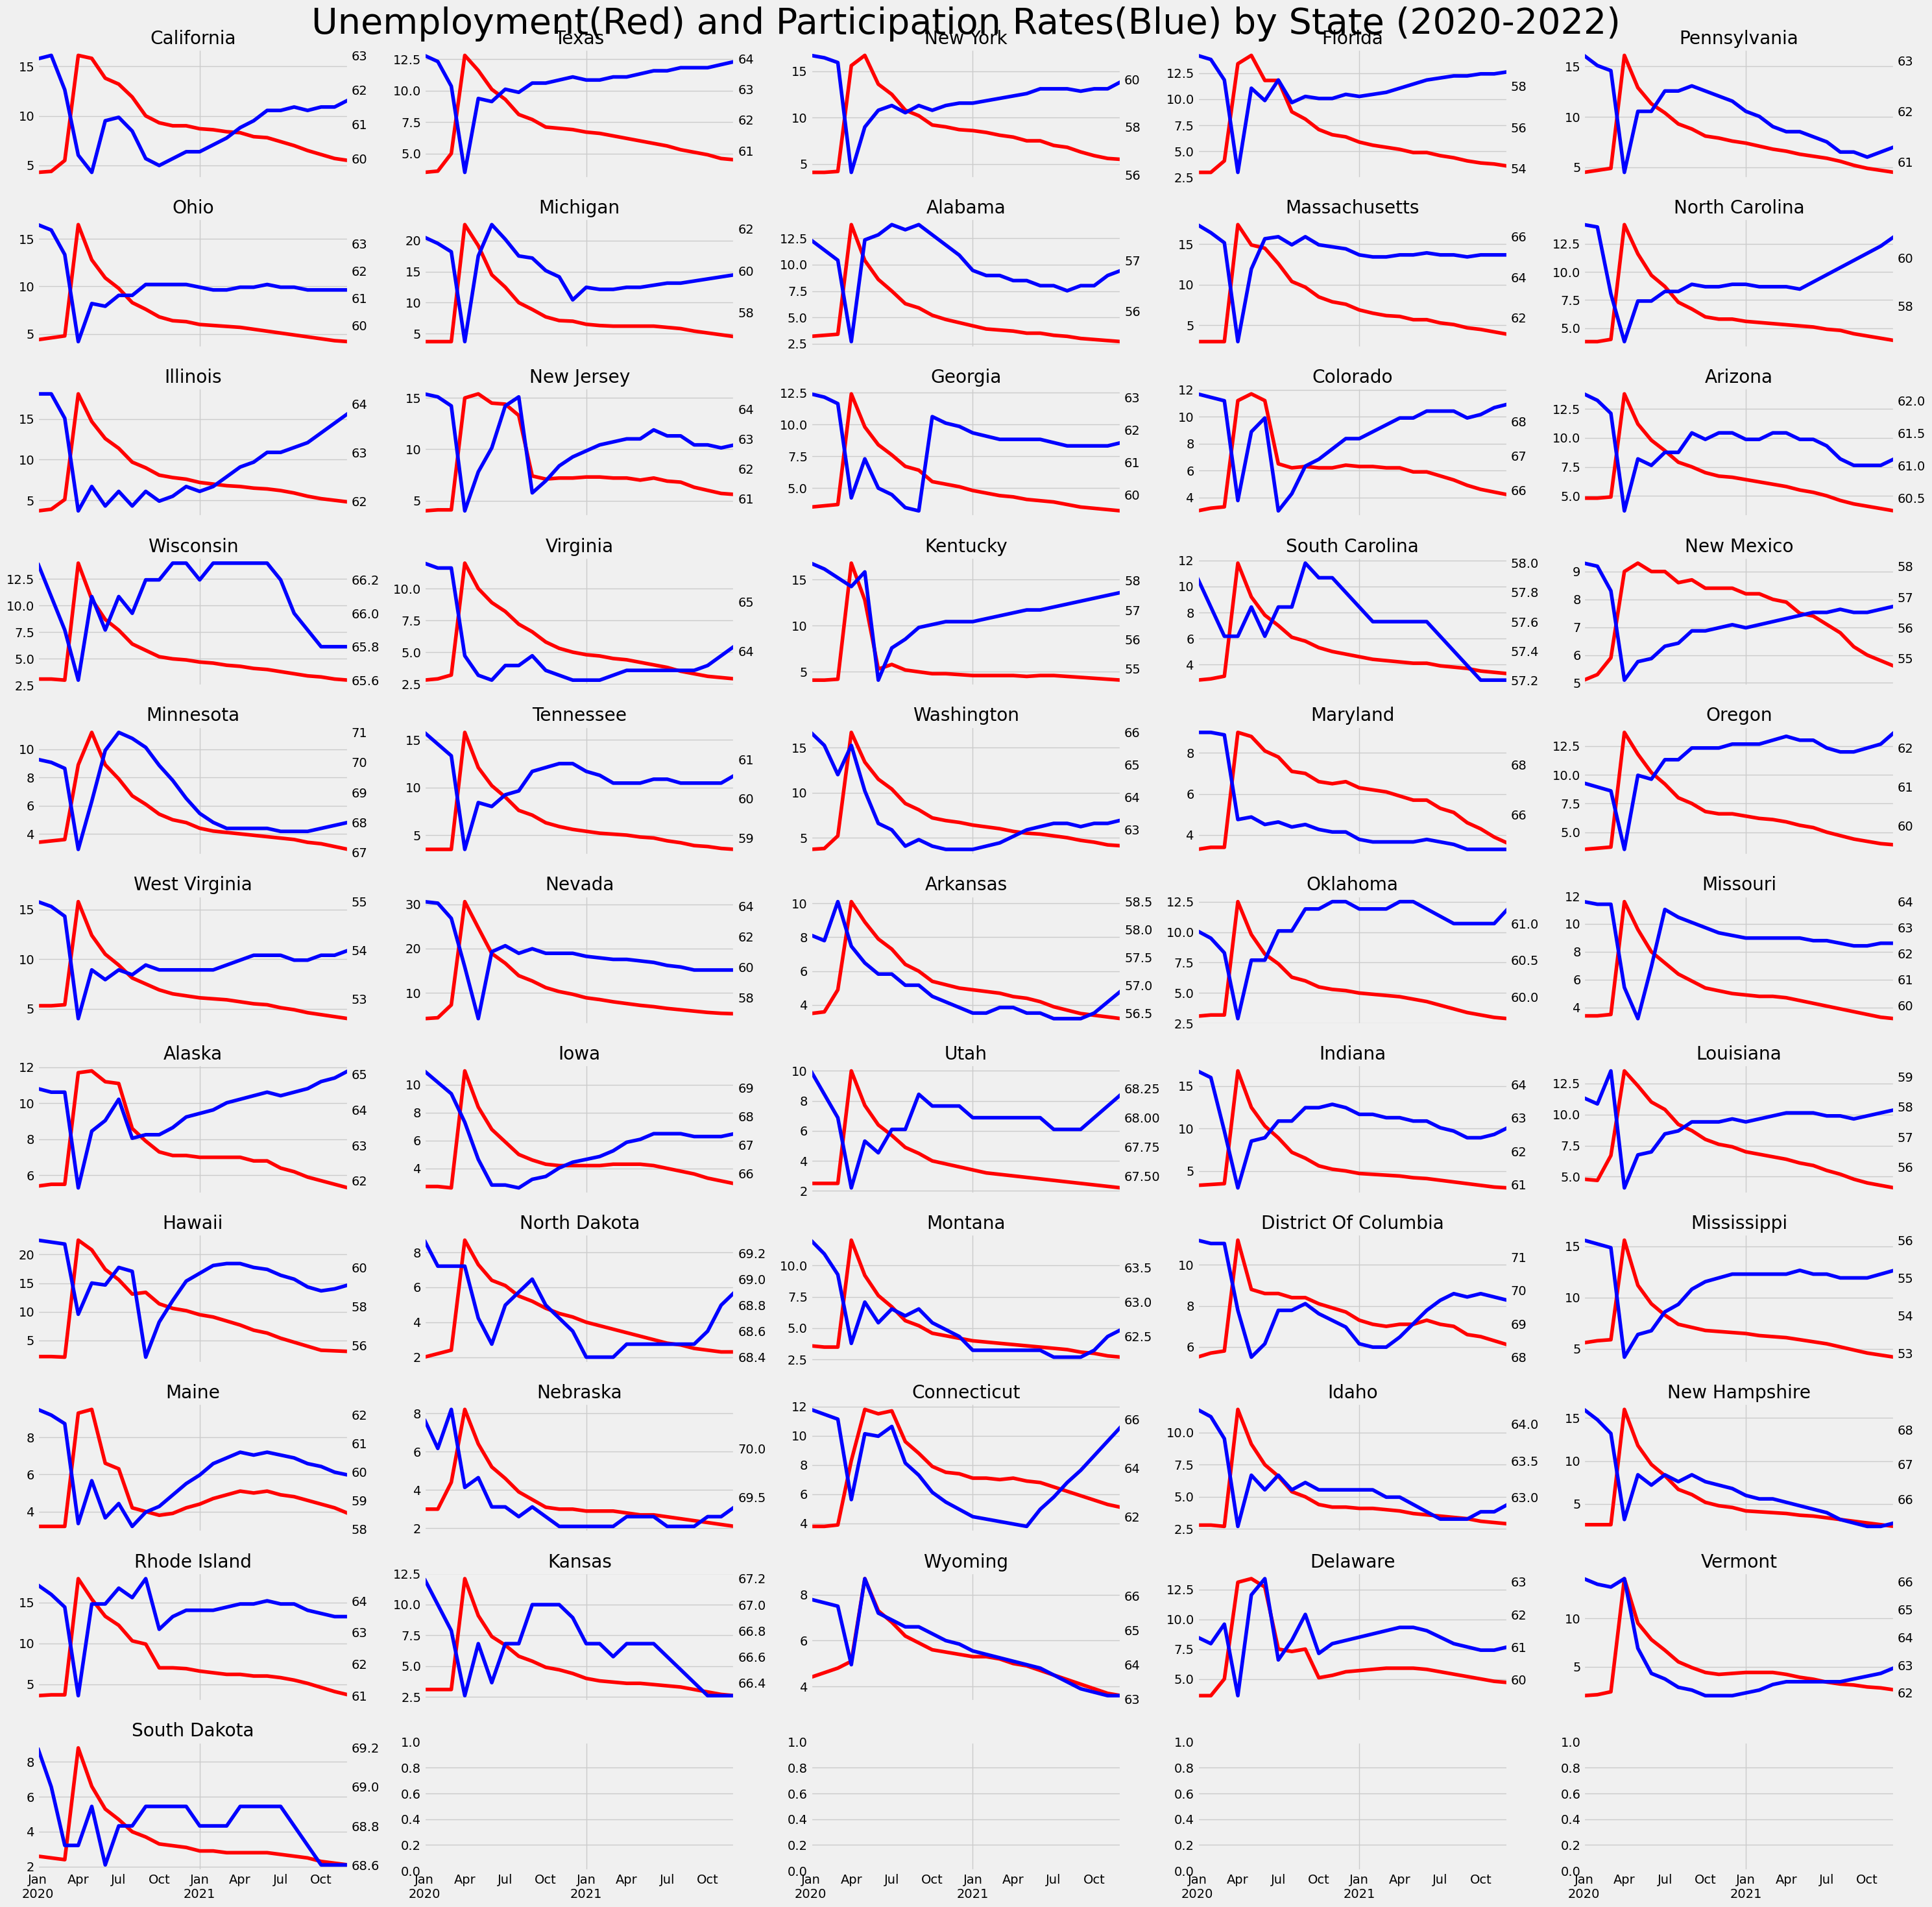

In [1078]:
fig, axs = plt.subplots(11, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()
#ere, axs is a 2D array with shape (11, 5). If you want to iterate over all subplots in a single loop, 
#you need to convert this 2D array into a 1D array. This is where flatten() comes in:
i = 0
for state in unemp_states.columns:
    if state in ["Puerto Rico"]:
        continue
    if state not in part_states.columns:
        print(f"Column {state} not found in part_states, skipping...")
        continue
    ax2 = axs[i].twinx()
    # axs[i] accesses the i-th Axes object in the flattened array
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment',color='Red')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation',color='Blue')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
# Adding a common title for the entire figure
fig.suptitle('Unemployment(Red) and Participation Rates(Blue) by State (2020-2022)', fontsize=40)
plt.tight_layout()
plt.show()

***Some key Observations***:
Using  research to justify the observations
1. High economy states like  **California**,**Texas:** ,**New York**,**Florida** as their  diverse economy helped cushion the initial blow, but strict lockdown measures impacted sectors like tourism, finance hospitality. The rebound likely reflects the state's technology and innovation sectors.
2. Other states like:
 
    **a.)** **New Mexico**:  *Tourism* and *energy-dependent economy* struggled with prolonged high unemployment and a substantial drop in labor force participation, indicating a sluggish recovery.

   **b.)** **West Virginia**:  *Declining coal industry* and *older workforce* led to a significant decrease in labor force participation, coupled with elevated unemployment and a slow rebound.

   **c.)** **Mississippi**:  Existing *socioeconomic challenges* were exacerbated by the pandemic, resulting in persistent high unemployment and a notable decline in labor force participation with limited recovery.

   **d.)** **Hawaii**: Reliance on tourism caused a devastating initial unemployment spike, but participation rebounded faster than other struggling states as tourism gradually resumed.

# Pulling 2008 Banking crisis results 

In [1081]:
unemp_bankcrisis=unemp_states.query('index >=2006 and index <=2011')
part_bankcrisis=part_states.query('index >=2006 and index <=2011')

**Unemployment V/s Job Participation** in American States 2008-2011

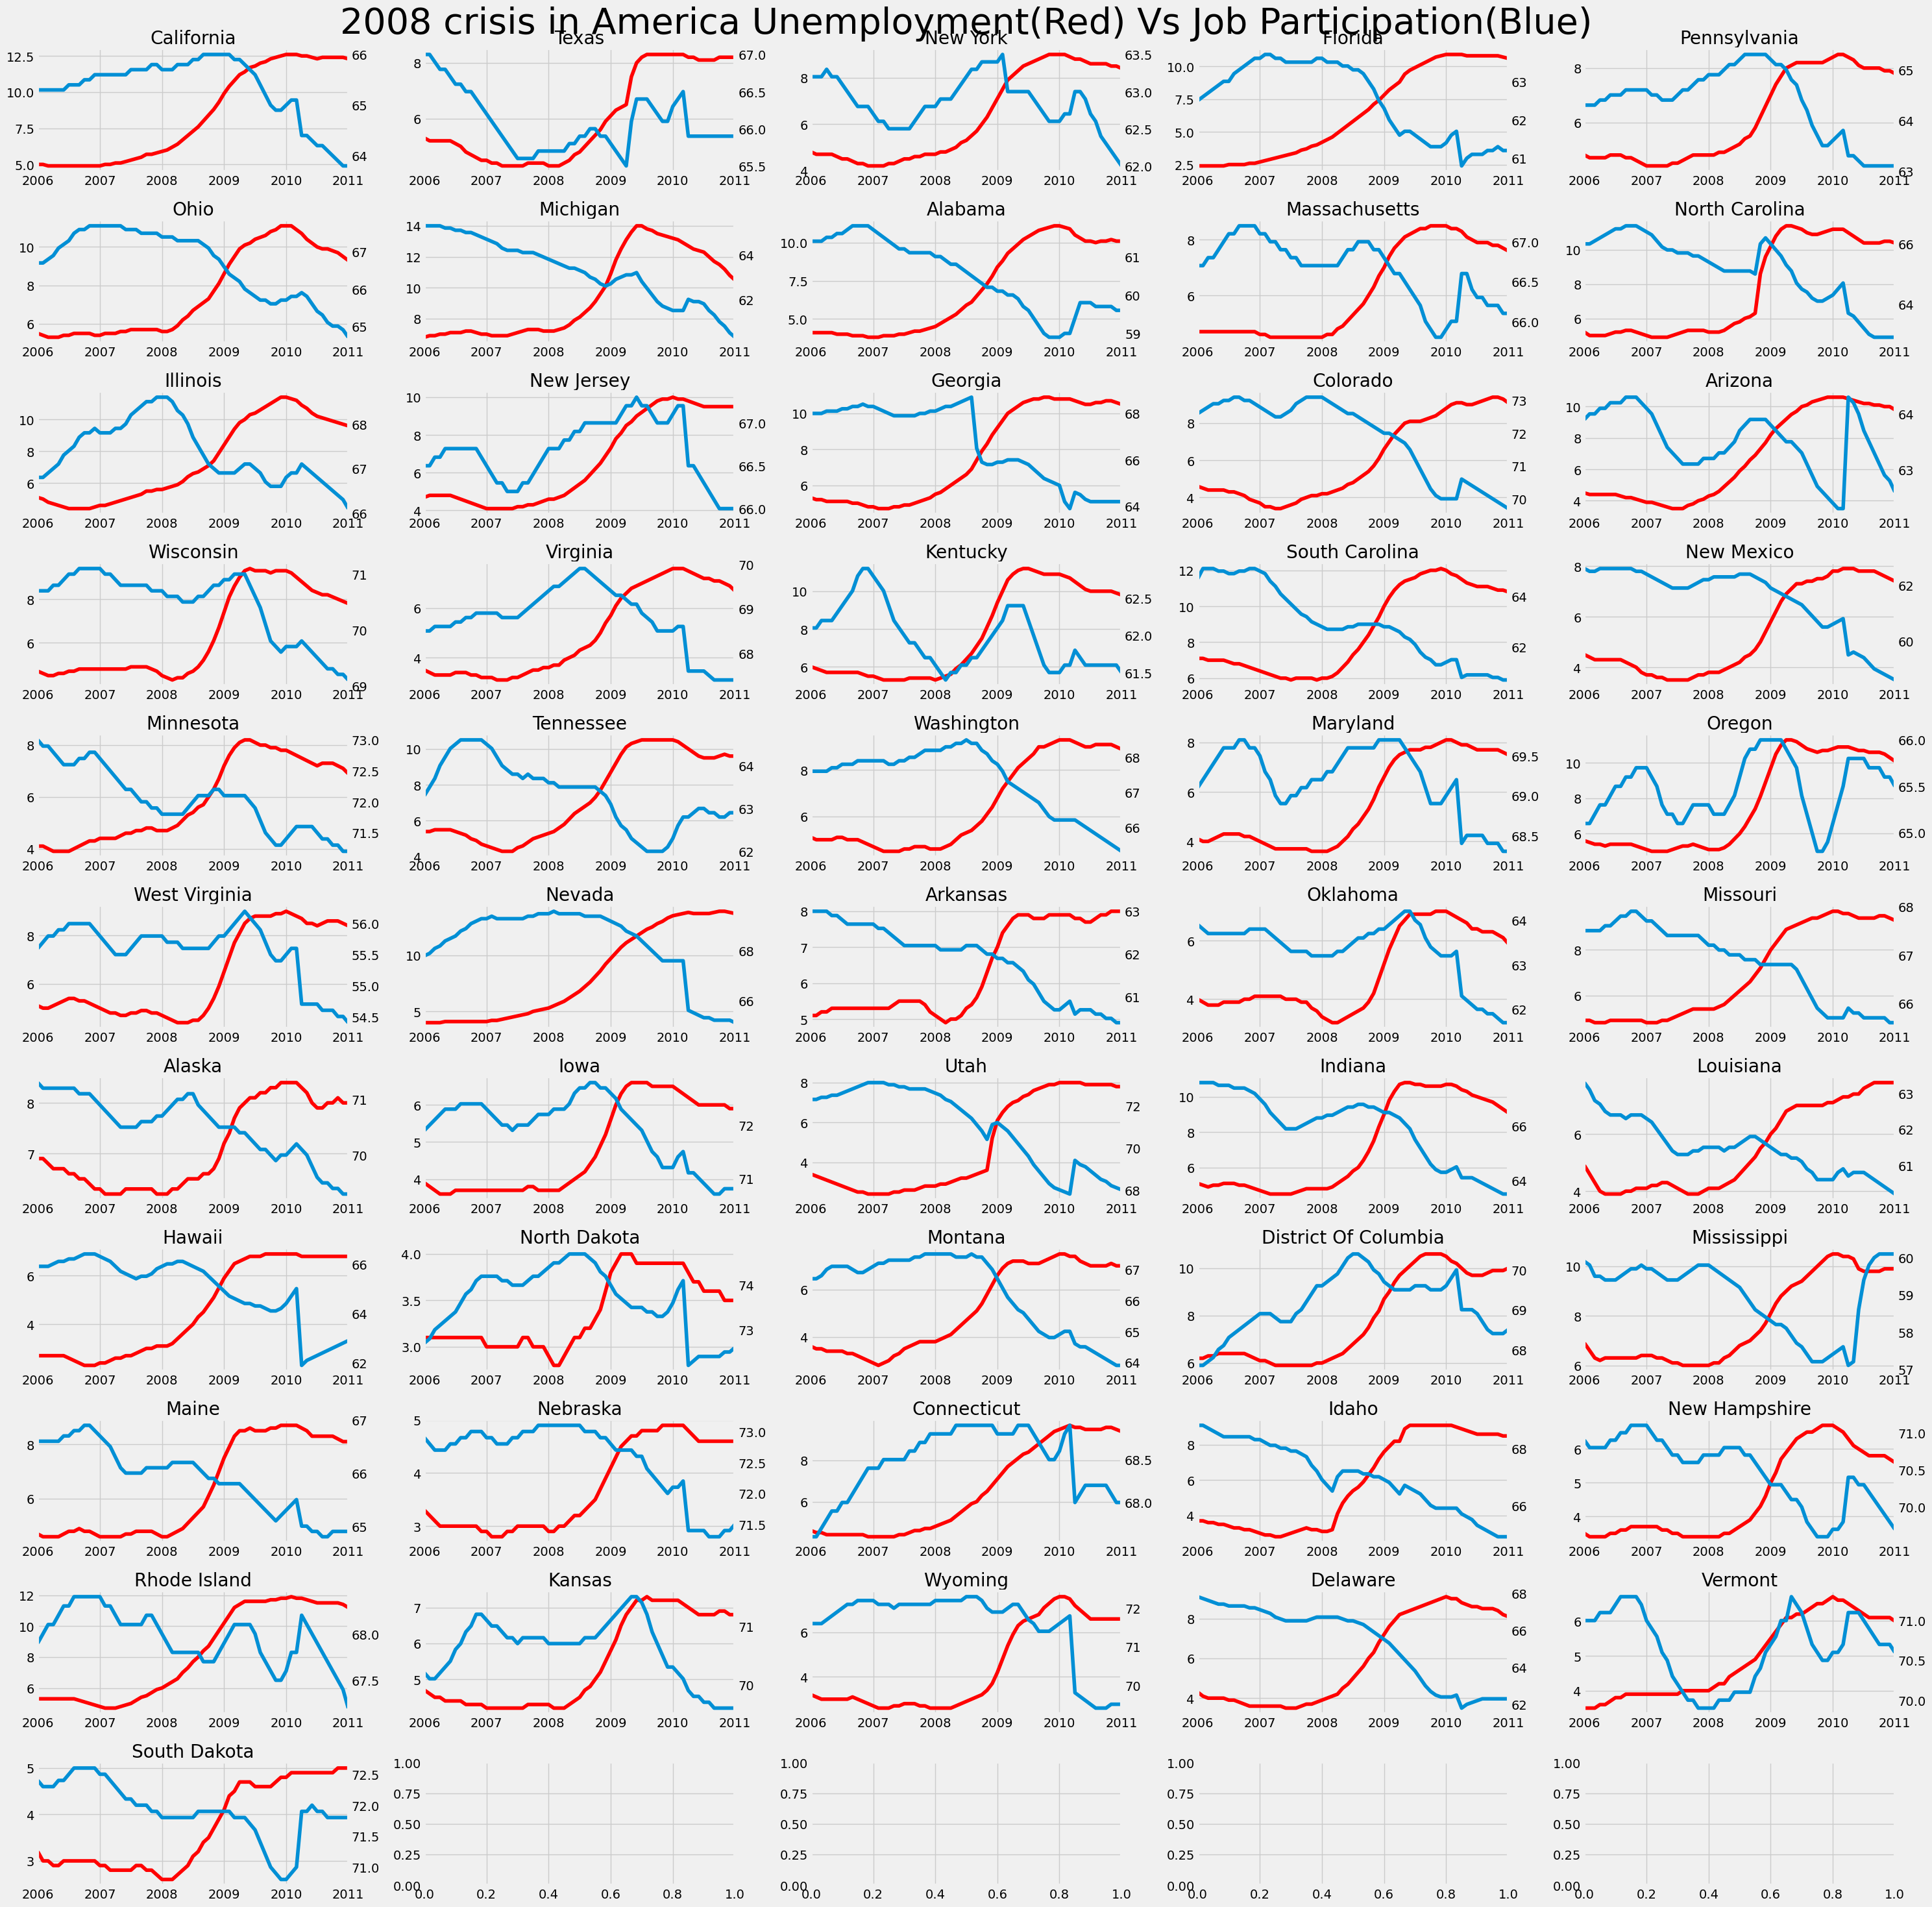

In [1108]:
fig , axs=plt.subplots(11,5,figsize=(30,30))
axs=axs.flatten()
i=0
for states in unemp_states.columns:
    if states in ['Puerto Rico']:
        continue
    ax2=axs[i].twinx()
    unemp_bankcrisis[states].plot(ax=axs[i],color='Red')
    part_bankcrisis[states].plot(ax=ax2)
    ax2.grid(False)
    axs[i].set_title(states)
    i+=1
fig.suptitle('2008 crisis in America Unemployment(Red) Vs Job Participation(Blue)',fontsize=40)
plt.tight_layout()
plt.show()

*All states were equally and badly affected some were bad while others were worse*

# Comparing the unemployment and Job Participation rate in 2008 and 2020 crisis


In [1087]:
unemp_mean=unemp_states.mean(axis=1).to_frame()
part_mean=part_states.mean(axis=1).to_frame()

***Plotting unemployment rate***

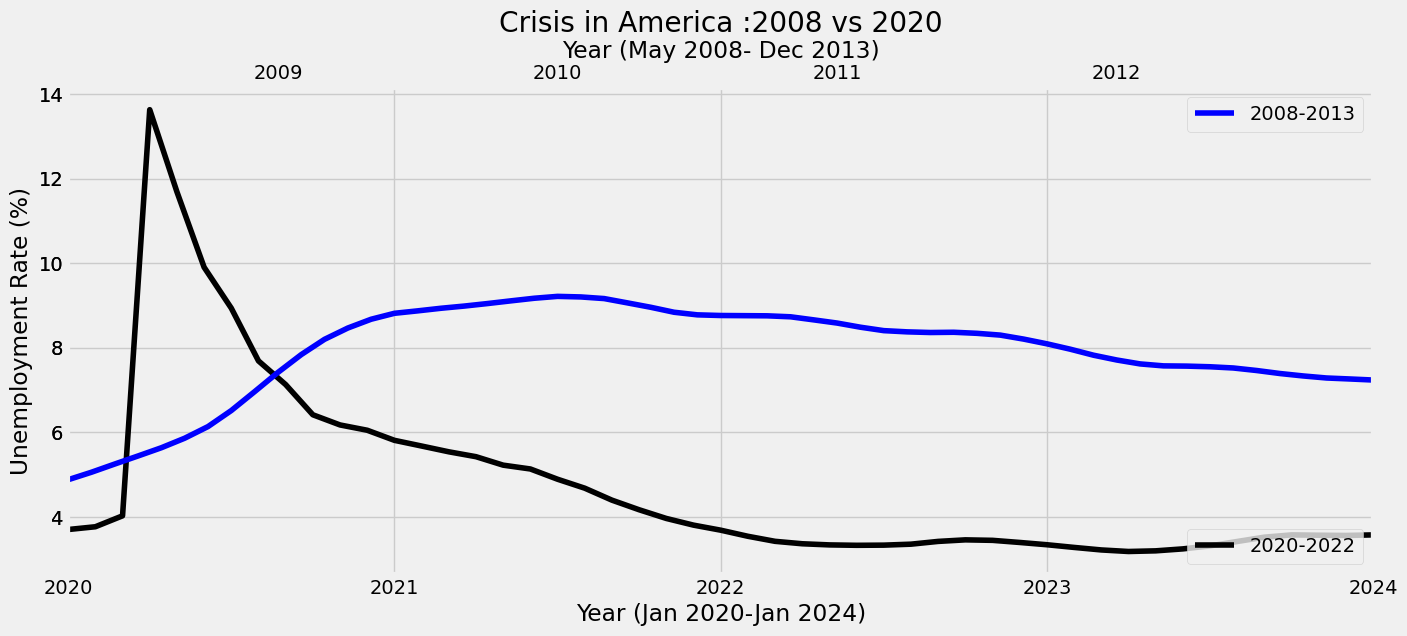

In [1089]:
fig,ax=plt.subplots()
ax2=ax.twiny() #twiny ensured that there is a common y axis and 2 X-Axis
unemp_mean.query('index>=2020 and index <=2024')[0].plot(ax=ax,figsize=(15,6),color='black',label='2020-2022')
unemp_mean.query('index >="04/2008" and index <2013')[0].plot(ax=ax2,figsize=(15,6),color='Blue',label='2008-2013')
# [0] ensures proper indexing. this selects the first column of the dataframe and matches with index
ax2.grid(False)
plt.title('Crisis in America :2008 vs 2020')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(loc='lower right')
ax2.legend(loc='upper right')
ax.set_xlabel('Year (Jan 2020-Jan 2024)')  # Bottom x-axis label
ax2.set_xlabel('Year (May 2008- Dec 2013)')
plt.show()

As we can see from the above plot the *recovery* of employment was **slow** in case of 2008 crisis taking roughly 3 to 4 years to reach the pre-crisis levels

In 2020 , the initial shock was more severe with unemployment exceeding 16%, the recovery was much faster within 2 years

*Several factors contributed to the differing recovery speeds:*

1. **Nature of the Crisis:**

    ***2008:*** A financial crisis rooted in the housing market, with cascading effects on the broader economy. The financial sector required extensive repair, and most importantly the consumer and business confidence were deeply shaken.

    ***2020:*** Primarily a health crisis, with economic impacts stemming from lockdowns and restrictions. While severe, the underlying economic structure remained largely intact.

2. **Policy Responses:**
   
   ***2008:*** While significant, the response was initially slower and focused on stabilizing the financial system. Fiscal stimulus was implemented, but its impact was gradual.

   ***2020:*** A swift and massive response, including fiscal stimulus, enhanced unemployment benefits, and direct support to businesses. This helped prevent widespread bankruptcies and layoffs, fostering a quicker rebound.

3. **Labor Market Dynamics:**

    ***2008:*** The crisis led to structural changes in the labor market, with job losses concentrated in sectors like construction and finance. Re-employment was slower as workers needed to retrain or relocate.
   
    ***2020:*** Job losses were more widespread but often temporary, as businesses closed due to lockdowns. Once restrictions eased, many workers could return to their previous jobs, accelerating the recovery.

5. **Global Factors:**
 
    ***2008:*** The crisis was global, with interconnected economies experiencing simultaneous downturns. This limited the potential for external demand to drive recovery.
   
    ***2020:*** While global, the recovery trajectories varied. Some economies, like the US, implemented aggressive stimulus measures, which helped boost demand for goods and services from other countries.

***Plotting job participation Rate***

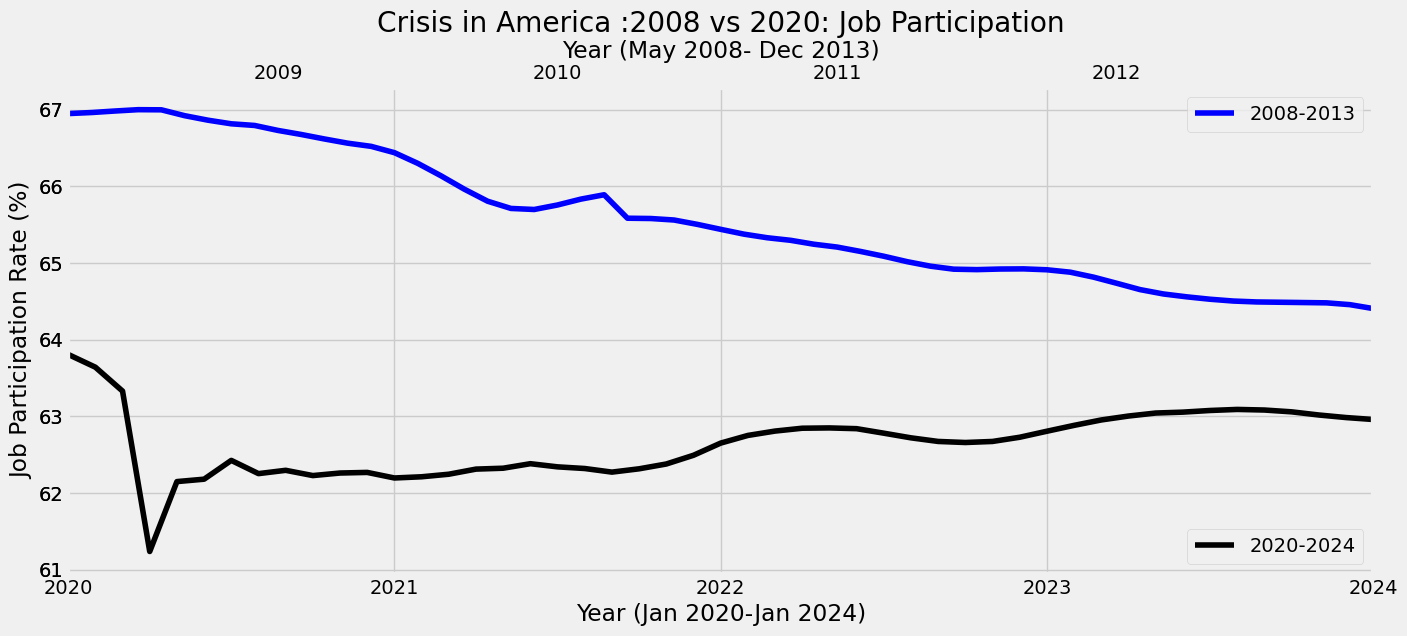

In [1131]:
fig,ax=plt.subplots()
ax2=ax.twiny()
part_mean.query('index>=2020 and index <=2024')[0].plot(ax=ax,figsize=(15,6),color='black',label='2020-2024')
part_mean.query('index >="04/2008" and index <2013')[0].plot(ax=ax2,figsize=(15,6),color='Blue',label='2008-2013')
# [0] ensures proper indexing. this selects the first column of the dataframe and matches with index
ax2.grid(False)
plt.title('Crisis in America :2008 vs 2020: Job Participation')
ax.set_ylabel('Job Participation Rate (%)')
ax.legend(loc='lower right')
ax2.legend(loc='upper right')
ax.set_xlabel('Year (Jan 2020-Jan 2024)')  # Bottom x-axis label
ax2.set_xlabel('Year (May 2008- Dec 2013)')
plt.show()

From Above we saw that as of 2024 **unemployment is at lowest** i.e below 4% but from the above Job participation plot , it seems paradoxical when lower unemployment rate is juxtaposed with a **lower labor force participation rate!**

*From my research I found out the following factors that are responsible for this situation:*

1. **Demographic Changes:** The aging population has led to an increase in retirements, reducing the labor force participation rate. Many baby boomers have exited the workforce, and their numbers aren't being fully replaced by younger workers​ (Bureau of Labor Statistics)​.
2. **Increased School Enrollment:** More young people are staying in school longer, which decreases the number of people available to work at any given time​.
3. **Shift in Work Preferences:** There has been a shift in preferences, with some workers opting for freelance or insta and tiktok work, which may not always be captured in traditional labor force statistics​